# Homework 4 R08222067 Chuan-Yu Chang

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as ss
from sklearn.decomposition import PCA
import astropy.io.fits as pf

In [3]:
training = pf.open('Training.fits')
test = pf.open('Test.fits')

In [4]:
X_train = training[0].data
y_train = training[1].data
X_test = test[0].data
y_test = test[1].data

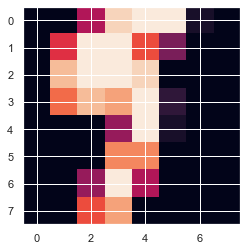

In [5]:
plt.imshow(X_train[20].reshape(8,8))

# PCA Decomposition 

In [6]:
pca = PCA(30)
pca.fit(X_train)
coeff = pca.transform(X_train)
coeff_test = pca.transform(X_test)

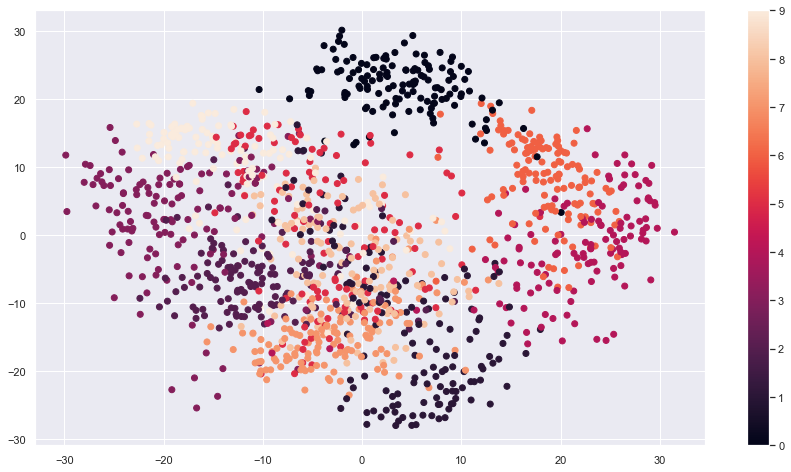

In [7]:
plt.figure(figsize=(15,8))
plt.scatter(coeff[:,0],coeff[:,1],c=y_train)
plt.colorbar()

In [8]:
import sklearn.linear_model as sl
import sklearn.metrics as sm
import sklearn.svm as ss

In [9]:
lr = sl.LogisticRegression(max_iter=1000000)
lr.fit(coeff[:,:2],y_train)
number_pred = lr.predict(coeff[:,:2])

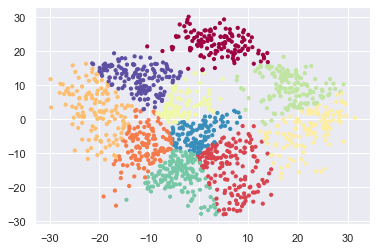

In [10]:
plt.scatter(coeff[:,0],coeff[:,1],c=number_pred,cmap=plt.cm.get_cmap('Spectral', 10),s=10)

In [31]:
n_coeff = []
acc_score = []
acc_score_test = []

# Logistic Regression

## 1. Write a code to do "for loop" to increase the number of coefficients used in the training and plot x-axis (Number of coefficients) and y-axis (accuracy score)
## 2. Apply the method to test data set, produce the same plot x-axis (Number of coefficients) and y-axis (accuracy score),

In [22]:
for i in range(1,30):
    lr = sl.LogisticRegression(max_iter=1000000)
    lr.fit(coeff[:,:i],y_train)
    number_pred = lr.predict(coeff[:,:i])
    number_pred_test = lr.predict(coeff_test[:,:i])
    n_coeff.append(i)
    acc_score.append(sm.accuracy_score(y_train,number_pred))
    acc_score_test.append(sm.accuracy_score(y_test,number_pred_test))

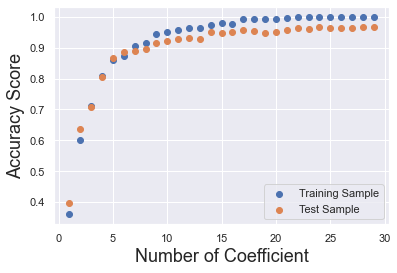

In [23]:
plt.scatter(n_coeff,acc_score,label=r"Training Sample")
plt.scatter(n_coeff,acc_score_test,label=r"Test Sample")
plt.xlabel("Number of Coefficient",fontsize=18)
plt.ylabel("Accuracy Score",fontsize=18)
plt.legend()

## 3. Observe the two curves and answer the following questions:
## a. At which point the model starts to overfit the training dataset.
## b. What is the best accuracy score we can get by using a logistic regression model.

## Ans : About 9 coefficients , 0.9667 for test sample 

In [24]:
print(acc_score_test)

[0.3977777777777778, 0.6355555555555555, 0.7088888888888889, 0.8044444444444444, 0.8666666666666667, 0.8844444444444445, 0.8888888888888888, 0.8955555555555555, 0.9155555555555556, 0.9222222222222223, 0.9288888888888889, 0.9311111111111111, 0.9288888888888889, 0.9511111111111111, 0.9466666666666667, 0.9511111111111111, 0.9577777777777777, 0.9533333333333334, 0.9488888888888889, 0.9511111111111111, 0.9555555555555556, 0.9622222222222222, 0.96, 0.9666666666666667, 0.9644444444444444, 0.9644444444444444, 0.9622222222222222, 0.9666666666666667, 0.9666666666666667]


# Support Vector Machine 

## 4. Use linear SVM and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training.

In [26]:
for i in range(1,30):
    svm = ss.LinearSVC(max_iter=100000)
    svm.fit(coeff[:,:i],y_train)
    number_pred = svm.predict(coeff[:,:i])
    number_pred_test = svm.predict(coeff_test[:,:i])
    n_coeff.append(i)
    acc_score.append(sm.accuracy_score(y_train,number_pred))
    acc_score_test.append(sm.accuracy_score(y_test,number_pred_test))

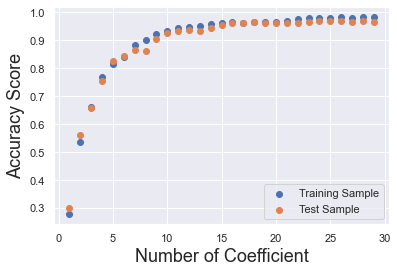

In [111]:
plt.scatter(n_coeff,acc_score,label=r"Training Sample")
plt.scatter(n_coeff,acc_score_test,label=r"Test Sample")
plt.xlabel("Number of Coefficient",fontsize=18)
plt.ylabel("Accuracy Score",fontsize=18)
plt.legend()

In [27]:
print(acc_score_test)

[0.3022222222222222, 0.56, 0.6577777777777778, 0.7555555555555555, 0.8266666666666667, 0.8444444444444444, 0.8666666666666667, 0.86, 0.9044444444444445, 0.9244444444444444, 0.9333333333333333, 0.9355555555555556, 0.9311111111111111, 0.9444444444444444, 0.9533333333333334, 0.9622222222222222, 0.9622222222222222, 0.9644444444444444, 0.96, 0.96, 0.96, 0.96, 0.9644444444444444, 0.9688888888888889, 0.9688888888888889, 0.9688888888888889, 0.9666666666666667, 0.9688888888888889, 0.9666666666666667]


# Kernal Support Vector Machine 

## 5. Use KERNEL SVM and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training.


In [29]:
for i in range(1,30):
    svm = ss.SVC(kernel='rbf')
    svm.fit(coeff[:,:i],y_train)
    number_pred = svm.predict(coeff[:,:i])
    number_pred_test = svm.predict(coeff_test[:,:i])
    n_coeff.append(i)
    acc_score.append(sm.accuracy_score(y_train,number_pred))
    acc_score_test.append(sm.accuracy_score(y_test,number_pred_test))

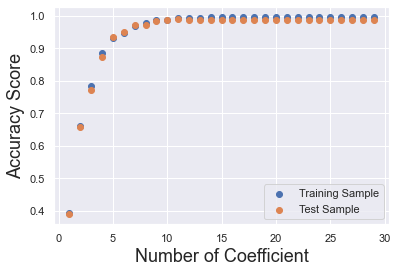

In [80]:
plt.scatter(n_coeff,acc_score,label=r"Training Sample")
plt.scatter(n_coeff,acc_score_test,label=r"Test Sample")
plt.xlabel("Number of Coefficient",fontsize=18)
plt.ylabel("Accuracy Score",fontsize=18)
plt.legend()

In [30]:
print(acc_score_test)

[0.3888888888888889, 0.6577777777777778, 0.7711111111111111, 0.8733333333333333, 0.9355555555555556, 0.9511111111111111, 0.9711111111111111, 0.9711111111111111, 0.9844444444444445, 0.9888888888888889, 0.9911111111111112, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9866666666666667, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889]


## 6. What is the best accuracy score you can get for the test data set with SVM (both linear and Kernel)?

## Ans: 0.969 for linear SVM and 0.989 for kernel SVM 

# Random Forest 

## 7. Use Random forest and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training.

In [17]:
import sklearn.ensemble as se 

In [32]:
for i in range(1,31):
    rf = se.RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=100)
    rf.fit(coeff[:,:i],y_train)
    number_pred = rf.predict(coeff[:,:i])
    number_pred_test = rf.predict(coeff_test[:,:i])
    n_coeff.append(i)
    acc_score.append(sm.accuracy_score(y_train,number_pred))
    acc_score_test.append(sm.accuracy_score(y_test,number_pred_test))

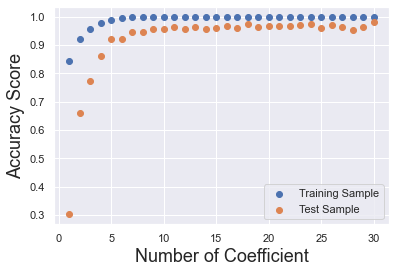

In [19]:
plt.scatter(n_coeff,acc_score,label=r"Training Sample")
plt.scatter(n_coeff,acc_score_test,label=r"Test Sample")
plt.xlabel("Number of Coefficient",fontsize=18)
plt.ylabel("Accuracy Score",fontsize=18)
plt.legend()

In [33]:
print(acc_score_test)

[0.3111111111111111, 0.6555555555555556, 0.7755555555555556, 0.8577777777777778, 0.9311111111111111, 0.9244444444444444, 0.9355555555555556, 0.9466666666666667, 0.9511111111111111, 0.9577777777777777, 0.9577777777777777, 0.9577777777777777, 0.9622222222222222, 0.9666666666666667, 0.9644444444444444, 0.9688888888888889, 0.96, 0.9555555555555556, 0.9733333333333334, 0.9622222222222222, 0.9688888888888889, 0.9666666666666667, 0.9755555555555555, 0.9688888888888889, 0.9644444444444444, 0.96, 0.9688888888888889, 0.9666666666666667, 0.9644444444444444, 0.9711111111111111]


## 8. (a.) Print the feature importance, and tell me which feature is the most important.

In [98]:
rf = se.RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=100)
rf.fit(coeff[:,:30],y_train)
number_pred = rf.predict(coeff[:,:30])
number_pred_test = rf.predict(coeff_test[:,:30])

In [106]:
importance = rf.feature_importances_

In [112]:
import pandas as pd 

In [101]:
forest_importance = pd.Series(importance,n_coeff)

Text(0, 0.5, 'Importance')

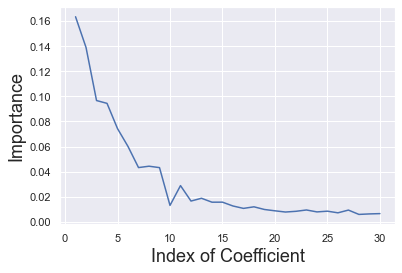

In [104]:
forest_importance.plot()
plt.xlabel("Index of Coefficient",fontsize=18)
plt.ylabel("Importance",fontsize=18)

## (b.) What is the best accuracy score you can get for the test data set with Random forest method.

## Ans: 0.973

## 9. Compare the best accuracy scores from logistic regression, SVM, random forest and tell me which model works the best?

## Ans : According to the best accuracy score for each model , kernel SVM is the best 